In [17]:
from tensorflow.keras.datasets import mnist
(train_input,train_target),(test_input,test_target) = mnist.load_data()

In [18]:
train_input.shape

(60000, 28, 28)

In [19]:
train_target.shape

(60000,)

In [20]:
print(set(train_target))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [21]:
from tensorflow.keras.utils import to_categorical
train_target = to_categorical(train_target)

In [22]:
train_input = train_input.reshape((-1,28,28,1)) / 255.0

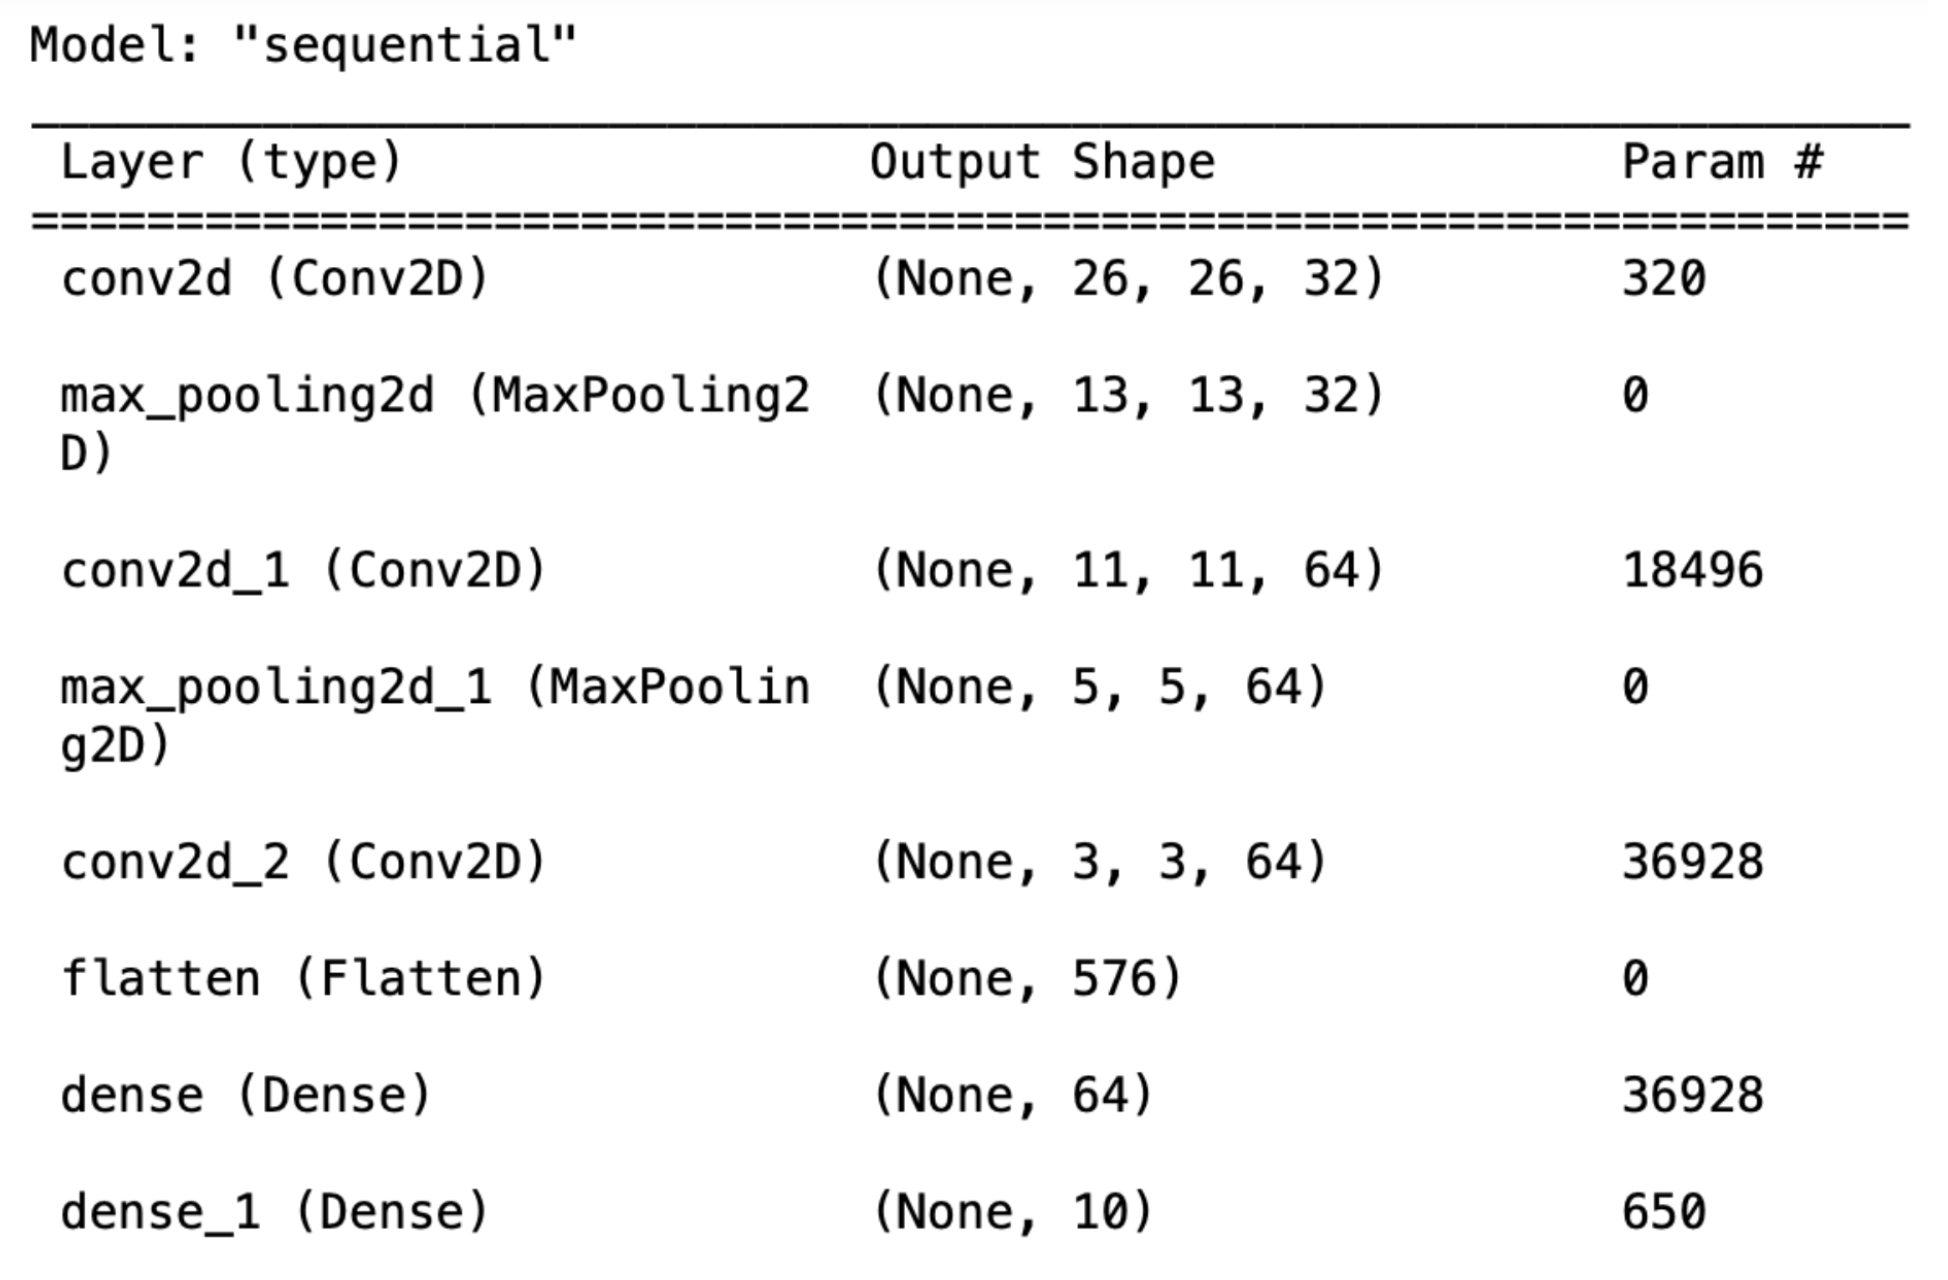

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [24]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_input,train_target,epochs=5)

Epoch 1/5


2023-10-17 15:40:29.205157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 29s 14ms/step - loss: 0.1482 - accuracy: 0.9534
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0504 - accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0385 - accuracy: 0.9890
Epoch 4/5
1037/1875 [===============>..............] - ETA: 14s - loss: 0.0295 - accuracy: 0.9919